# Importing all necessary libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.display import display, HTML
import time
import warnings
warnings.filterwarnings('ignore')

In [73]:
# pip install geopy

# Installing Folium 

In [76]:
# pip install folium

In [78]:
pip list

Package                    Version
-------------------------- ----------------
absl-py                    2.1.0
aext-assistant             4.0.15
aext-assistant-server      4.0.15
aext-core                  4.0.15
aext-core-server           4.0.15
aext-panels                4.0.15
aext-panels-server         4.0.15
aext-share-notebook        4.0.15
aext-share-notebook-server 4.0.15
aext-shared                4.0.15
aiohttp                    3.9.5
aiosignal                  1.2.0
alembic                    1.14.1
anaconda-anon-usage        0.4.4
anaconda-catalogs          0.2.0
anaconda-client            1.12.3
anaconda-cloud-auth        0.5.1
anaconda-navigator         2.6.0
anaconda-project           0.11.1
annotated-types            0.6.0
anyascii                   0.3.2
anyio                      4.2.0
appdirs                    1.4.4
archspec                   0.2.3
argon2-cffi                21.3.0
argon2-cffi-bindings       21.2.0
arrow                      1.3.0
asttokens       

# Reading both datasets

In [80]:
df1 = pd.read_csv("zomato_data.csv")

In [81]:
df1

online_order book_table    rate  votes            rest_type  \
0              Yes        Yes   4.1/5    775        Casual Dining   
1              Yes         No   4.1/5    787        Casual Dining   
2              Yes         No   3.8/5    918  Cafe, Casual Dining   
3               No         No   3.7/5     88          Quick Bites   
4               No         No   3.8/5    166        Casual Dining   
...            ...        ...     ...    ...                  ...   
51712           No         No  3.6 /5     27                  Bar   
51713           No         No     NaN      0                  Bar   
51714           No         No     NaN      0                  Bar   
51715           No        Yes  4.3 /5    236                  Bar   
51716           No         No  3.4 /5     13   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
51712                                                NaN   
51713                                                NaN   
51714                                                NaN   
51715                       Cocktails, Pizza, Buttermilk   
51716                                                NaN   

                                     cuisines approx_costfor_two_people  \
0              North Indian, Mughlai, Chinese                       800   
1                 Chinese, North Indian, Thai                       800   
2                      Cafe, Mexican, Italian                       800   
3                  South Indian, North Indian                       300   
4                    North Indian, Rajasthani                       600   
...                                       ...                       ...   
51712                             Continental                     1,500   
51713                             Finger Food                       600   
51714                             Finger Food                     2,000   
51715                             Finger Food                     2,500   
51716  Finger Food, North Indian, Continental                     1,500   

       listed_intype listed_incity  
0             Buffet  Banashankari  
1             Buffet  Banashankari  
2             Buffet  Banashankari  
3             Buffet  Banashankari  
4             Buffet  Banashankari  
...              ...           ...  
51712  Pubs and bars    Whitefield  
51713  Pubs and bars    Whitefield  
51714  Pubs and bars    Whitefield  
51715  Pubs and bars    Whitefield  
51716  Pubs and bars    Whitefield  

[51717 rows x 10 columns]

In [82]:
df2 = pd.read_csv("Geographical Coordinates.csv")

In [83]:
df2

listed_incity   Latitude  Longitude
0            Banashankari  12.939333  77.553982
1       Bannerghatta Road  12.952660  77.605048
2            Basavanagudi  12.941726  77.575502
3               Bellandur  12.925352  77.675941
4            Brigade Road  12.967358  77.606435
5             Brookefield  12.963814  77.722437
6                     BTM  12.916360  77.604733
7           Church Street  12.974914  77.605247
8         Electronic City  12.848760  77.648253
9             Frazer Town  12.998683  77.615525
10                    HSR  12.900563  77.649475
11            Indiranagar  12.996298  77.545278
12              Jayanagar  12.939904  77.582638
13               JP Nagar  12.909694  77.586607
14           Kalyan Nagar  13.022142  77.640337
15           Kammanahalli  13.014854  77.638203
16  Koramangala 4th Block  12.932778  77.629405
17  Koramangala 5th Block  12.934843  77.618977
18  Koramangala 6th Block  12.939025  77.623848
19  Koramangala 7th Block  12.936485  77.613478
20           Lavelle Road  12.968340  77.596507
21           Malleshwaram  13.002735  77.570325
22           Marathahalli  12.955257  77.698416
23                MG Road  12.975526  77.606790
24           New BEL Road  13.039186  77.564284
25       Old Airport Road  12.960632  77.642500

# Data cleaning and preprocessing

### Step 1: Cleaning 'rate' column

In [86]:
df1['rate'] = df1['rate'].replace('-', np.nan) #Replacing '-' values with NaN
df1['rate'] = df1['rate'].str.replace('/5', '', regex=False).str.strip() #Removed /5 and retain only the numeric value
df1['rate'] = pd.to_numeric(df1['rate'], errors='coerce') #Converting to float using pd.to_numeric()
df1['rate'].fillna(df1['rate'].median(), inplace=True) #Filling the missing values using the median rating

In [103]:
print(df1.info())
print("\nMissing values:\n", df1.isnull().sum())
print("\nDescribe:\n",df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  object 
 1   book_table                 51717 non-null  object 
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51490 non-null  object 
 5   dish_liked                 23639 non-null  object 
 6   cuisines                   51672 non-null  object 
 7   approx_costfor_two_people  51371 non-null  object 
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.9+ MB
None

Missing values:
 online_order                     0
book_table                       0
rate                             0
votes                        

### Step 2: Cleaning 'approx_cost(for two people)' column

In [111]:
df1.rename(columns={'approx_cost(for_two_people)': 'approx_costfor_two_people'}, inplace=True) #Renaming the column name
df1['approx_costfor_two_people'] = df1['approx_costfor_two_people'].astype(str).str.replace(',', '', regex=False) #Removing commas from numeric strings ('1,000' → '1000')
df1['approx_costfor_two_people'] = pd.to_numeric(df1['approx_costfor_two_people'], errors='coerce') #Converting approx_costfor_two_people to numeric
df1['approx_costfor_two_people'].fillna(df1['approx_costfor_two_people'].median(), inplace=True) # Filling the missing values with the median cost

In [113]:
df1

online_order book_table  rate  votes            rest_type  \
0              Yes        Yes   4.1    775        Casual Dining   
1              Yes         No   4.1    787        Casual Dining   
2              Yes         No   3.8    918  Cafe, Casual Dining   
3               No         No   3.7     88          Quick Bites   
4               No         No   3.8    166        Casual Dining   
...            ...        ...   ...    ...                  ...   
51712           No         No   3.6     27                  Bar   
51713           No         No   3.7      0                  Bar   
51714           No         No   3.7      0                  Bar   
51715           No        Yes   4.3    236                  Bar   
51716           No         No   3.4     13   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
51712                                                NaN   
51713                                                NaN   
51714                                                NaN   
51715                       Cocktails, Pizza, Buttermilk   
51716                                                NaN   

                                     cuisines  approx_costfor_two_people  \
0              North Indian, Mughlai, Chinese                      800.0   
1                 Chinese, North Indian, Thai                      800.0   
2                      Cafe, Mexican, Italian                      800.0   
3                  South Indian, North Indian                      300.0   
4                    North Indian, Rajasthani                      600.0   
...                                       ...                        ...   
51712                             Continental                     1500.0   
51713                             Finger Food                      600.0   
51714                             Finger Food                     2000.0   
51715                             Finger Food                     2500.0   
51716  Finger Food, North Indian, Continental                     1500.0   

       listed_intype listed_incity  
0             Buffet  Banashankari  
1             Buffet  Banashankari  
2             Buffet  Banashankari  
3             Buffet  Banashankari  
4             Buffet  Banashankari  
...              ...           ...  
51712  Pubs and bars    Whitefield  
51713  Pubs and bars    Whitefield  
51714  Pubs and bars    Whitefield  
51715  Pubs and bars    Whitefield  
51716  Pubs and bars    Whitefield  

[51717 rows x 10 columns]

In [115]:
print(df1.info())
print("\nMissing values:\n", df1.isnull().sum())
print("\nDescribe:\n",df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  object 
 1   book_table                 51717 non-null  object 
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51490 non-null  object 
 5   dish_liked                 23639 non-null  object 
 6   cuisines                   51672 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB
None

Missing values:
 online_order                     0
book_table                       0
rate                             0
votes                        

### Step 3: Cleaning categorical columns

In [122]:
df1['dish_liked'].fillna("Not Available", inplace=True) # dish_liked → Replace NaN with "Not Available"
df1['cuisines'].fillna("Other", inplace=True) # cuisines → Replace NaN with "Other"
df1['rest_type'].fillna("Unknown", inplace=True) # rest_type → Replace NaN with "Unknown"

In [124]:
df1

online_order book_table  rate  votes            rest_type  \
0              Yes        Yes   4.1    775        Casual Dining   
1              Yes         No   4.1    787        Casual Dining   
2              Yes         No   3.8    918  Cafe, Casual Dining   
3               No         No   3.7     88          Quick Bites   
4               No         No   3.8    166        Casual Dining   
...            ...        ...   ...    ...                  ...   
51712           No         No   3.6     27                  Bar   
51713           No         No   3.7      0                  Bar   
51714           No         No   3.7      0                  Bar   
51715           No        Yes   4.3    236                  Bar   
51716           No         No   3.4     13   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
51712                                      Not Available   
51713                                      Not Available   
51714                                      Not Available   
51715                       Cocktails, Pizza, Buttermilk   
51716                                      Not Available   

                                     cuisines  approx_costfor_two_people  \
0              North Indian, Mughlai, Chinese                      800.0   
1                 Chinese, North Indian, Thai                      800.0   
2                      Cafe, Mexican, Italian                      800.0   
3                  South Indian, North Indian                      300.0   
4                    North Indian, Rajasthani                      600.0   
...                                       ...                        ...   
51712                             Continental                     1500.0   
51713                             Finger Food                      600.0   
51714                             Finger Food                     2000.0   
51715                             Finger Food                     2500.0   
51716  Finger Food, North Indian, Continental                     1500.0   

       listed_intype listed_incity  
0             Buffet  Banashankari  
1             Buffet  Banashankari  
2             Buffet  Banashankari  
3             Buffet  Banashankari  
4             Buffet  Banashankari  
...              ...           ...  
51712  Pubs and bars    Whitefield  
51713  Pubs and bars    Whitefield  
51714  Pubs and bars    Whitefield  
51715  Pubs and bars    Whitefield  
51716  Pubs and bars    Whitefield  

[51717 rows x 10 columns]

In [126]:
print(df1.info())
print("\nMissing values:\n", df1.isnull().sum())
print("\nDescribe:\n",df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  object 
 1   book_table                 51717 non-null  object 
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB
None

Missing values:
 online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type 

### Step 4: Cleaning 'votes' column

In [134]:
df1['votes'].fillna(df1['votes'].median(), inplace=True) # Filling missing values in votes with median

In [136]:
df1

online_order book_table  rate  votes            rest_type  \
0              Yes        Yes   4.1    775        Casual Dining   
1              Yes         No   4.1    787        Casual Dining   
2              Yes         No   3.8    918  Cafe, Casual Dining   
3               No         No   3.7     88          Quick Bites   
4               No         No   3.8    166        Casual Dining   
...            ...        ...   ...    ...                  ...   
51712           No         No   3.6     27                  Bar   
51713           No         No   3.7      0                  Bar   
51714           No         No   3.7      0                  Bar   
51715           No        Yes   4.3    236                  Bar   
51716           No         No   3.4     13   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
51712                                      Not Available   
51713                                      Not Available   
51714                                      Not Available   
51715                       Cocktails, Pizza, Buttermilk   
51716                                      Not Available   

                                     cuisines  approx_costfor_two_people  \
0              North Indian, Mughlai, Chinese                      800.0   
1                 Chinese, North Indian, Thai                      800.0   
2                      Cafe, Mexican, Italian                      800.0   
3                  South Indian, North Indian                      300.0   
4                    North Indian, Rajasthani                      600.0   
...                                       ...                        ...   
51712                             Continental                     1500.0   
51713                             Finger Food                      600.0   
51714                             Finger Food                     2000.0   
51715                             Finger Food                     2500.0   
51716  Finger Food, North Indian, Continental                     1500.0   

       listed_intype listed_incity  
0             Buffet  Banashankari  
1             Buffet  Banashankari  
2             Buffet  Banashankari  
3             Buffet  Banashankari  
4             Buffet  Banashankari  
...              ...           ...  
51712  Pubs and bars    Whitefield  
51713  Pubs and bars    Whitefield  
51714  Pubs and bars    Whitefield  
51715  Pubs and bars    Whitefield  
51716  Pubs and bars    Whitefield  

[51717 rows x 10 columns]

In [138]:
print(df1.info())
print("\nMissing values:\n", df1.isnull().sum())
print("\nDescribe:\n",df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  object 
 1   book_table                 51717 non-null  object 
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB
None

Missing values:
 online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type 

### Step 5: Binary Encoding

In [143]:
df1['online_order'] = df1['online_order'].map({'Yes': 1, 'No': 0}) # Mapping online_order column values with 0 and 1
df1['book_table'] = df1['book_table'].map({'Yes': 1, 'No': 0}) # Mapping book_table column values with 0 and 1

In [145]:
df1

online_order  book_table  rate  votes            rest_type  \
0                 1           1   4.1    775        Casual Dining   
1                 1           0   4.1    787        Casual Dining   
2                 1           0   3.8    918  Cafe, Casual Dining   
3                 0           0   3.7     88          Quick Bites   
4                 0           0   3.8    166        Casual Dining   
...             ...         ...   ...    ...                  ...   
51712             0           0   3.6     27                  Bar   
51713             0           0   3.7      0                  Bar   
51714             0           0   3.7      0                  Bar   
51715             0           1   4.3    236                  Bar   
51716             0           0   3.4     13   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
51712                                      Not Available   
51713                                      Not Available   
51714                                      Not Available   
51715                       Cocktails, Pizza, Buttermilk   
51716                                      Not Available   

                                     cuisines  approx_costfor_two_people  \
0              North Indian, Mughlai, Chinese                      800.0   
1                 Chinese, North Indian, Thai                      800.0   
2                      Cafe, Mexican, Italian                      800.0   
3                  South Indian, North Indian                      300.0   
4                    North Indian, Rajasthani                      600.0   
...                                       ...                        ...   
51712                             Continental                     1500.0   
51713                             Finger Food                      600.0   
51714                             Finger Food                     2000.0   
51715                             Finger Food                     2500.0   
51716  Finger Food, North Indian, Continental                     1500.0   

       listed_intype listed_incity  
0             Buffet  Banashankari  
1             Buffet  Banashankari  
2             Buffet  Banashankari  
3             Buffet  Banashankari  
4             Buffet  Banashankari  
...              ...           ...  
51712  Pubs and bars    Whitefield  
51713  Pubs and bars    Whitefield  
51714  Pubs and bars    Whitefield  
51715  Pubs and bars    Whitefield  
51716  Pubs and bars    Whitefield  

[51717 rows x 10 columns]

In [147]:
print(df1.info())
print("\nMissing values:\n", df1.isnull().sum())
print("\nDescribe:\n",df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB
None

Missing values:
 online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type 

### Step 6: Final data type conversions

In [150]:
df1['rate'] = df1['rate'].astype(float) # rate → float
df1['votes'] = df1['votes'].astype(int) # votes → integer
df1['approx_costfor_two_people'] = df1['approx_costfor_two_people'].astype(int) # approx_costfor_two_people → integer

In [152]:
df1

online_order  book_table  rate  votes            rest_type  \
0                 1           1   4.1    775        Casual Dining   
1                 1           0   4.1    787        Casual Dining   
2                 1           0   3.8    918  Cafe, Casual Dining   
3                 0           0   3.7     88          Quick Bites   
4                 0           0   3.8    166        Casual Dining   
...             ...         ...   ...    ...                  ...   
51712             0           0   3.6     27                  Bar   
51713             0           0   3.7      0                  Bar   
51714             0           0   3.7      0                  Bar   
51715             0           1   4.3    236                  Bar   
51716             0           0   3.4     13   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
51712                                      Not Available   
51713                                      Not Available   
51714                                      Not Available   
51715                       Cocktails, Pizza, Buttermilk   
51716                                      Not Available   

                                     cuisines  approx_costfor_two_people  \
0              North Indian, Mughlai, Chinese                        800   
1                 Chinese, North Indian, Thai                        800   
2                      Cafe, Mexican, Italian                        800   
3                  South Indian, North Indian                        300   
4                    North Indian, Rajasthani                        600   
...                                       ...                        ...   
51712                             Continental                       1500   
51713                             Finger Food                        600   
51714                             Finger Food                       2000   
51715                             Finger Food                       2500   
51716  Finger Food, North Indian, Continental                       1500   

       listed_intype listed_incity  
0             Buffet  Banashankari  
1             Buffet  Banashankari  
2             Buffet  Banashankari  
3             Buffet  Banashankari  
4             Buffet  Banashankari  
...              ...           ...  
51712  Pubs and bars    Whitefield  
51713  Pubs and bars    Whitefield  
51714  Pubs and bars    Whitefield  
51715  Pubs and bars    Whitefield  
51716  Pubs and bars    Whitefield  

[51717 rows x 10 columns]

print(df1.info())
print("\nMissing values:\n", df1.isnull().sum())
print("\nDescribe:\n",df1.describe())

## Saving the cleaned zomato data

In [156]:
df1.to_csv("Cleaned_data.csv", index = False)

In [160]:
df1_cleaned = pd.read_csv("Cleaned_data.csv")

In [162]:
df1_cleaned

online_order  book_table  rate  votes            rest_type  \
0                 1           1   4.1    775        Casual Dining   
1                 1           0   4.1    787        Casual Dining   
2                 1           0   3.8    918  Cafe, Casual Dining   
3                 0           0   3.7     88          Quick Bites   
4                 0           0   3.8    166        Casual Dining   
...             ...         ...   ...    ...                  ...   
51712             0           0   3.6     27                  Bar   
51713             0           0   3.7      0                  Bar   
51714             0           0   3.7      0                  Bar   
51715             0           1   4.3    236                  Bar   
51716             0           0   3.4     13   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
51712                                      Not Available   
51713                                      Not Available   
51714                                      Not Available   
51715                       Cocktails, Pizza, Buttermilk   
51716                                      Not Available   

                                     cuisines  approx_costfor_two_people  \
0              North Indian, Mughlai, Chinese                        800   
1                 Chinese, North Indian, Thai                        800   
2                      Cafe, Mexican, Italian                        800   
3                  South Indian, North Indian                        300   
4                    North Indian, Rajasthani                        600   
...                                       ...                        ...   
51712                             Continental                       1500   
51713                             Finger Food                        600   
51714                             Finger Food                       2000   
51715                             Finger Food                       2500   
51716  Finger Food, North Indian, Continental                       1500   

       listed_intype listed_incity  
0             Buffet  Banashankari  
1             Buffet  Banashankari  
2             Buffet  Banashankari  
3             Buffet  Banashankari  
4             Buffet  Banashankari  
...              ...           ...  
51712  Pubs and bars    Whitefield  
51713  Pubs and bars    Whitefield  
51714  Pubs and bars    Whitefield  
51715  Pubs and bars    Whitefield  
51716  Pubs and bars    Whitefield  

[51717 rows x 10 columns]

## Merging the cleaned zomato data and geographicla co-ordinates data

In [164]:
merged_df = pd.merge(df1_cleaned, df2, on='listed_incity', how='left')

In [304]:
merged_df

online_order  book_table  rate  votes            rest_type  \
0                 1           1   4.1    775        Casual Dining   
1                 1           0   4.1    787        Casual Dining   
2                 1           0   3.8    918  Cafe, Casual Dining   
3                 0           0   3.7     88          Quick Bites   
4                 0           0   3.8    166        Casual Dining   
...             ...         ...   ...    ...                  ...   
51712             0           0   3.6     27                  Bar   
51713             0           0   3.7      0                  Bar   
51714             0           0   3.7      0                  Bar   
51715             0           1   4.3    236                  Bar   
51716             0           0   3.4     13   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
51712                                      Not Available   
51713                                      Not Available   
51714                                      Not Available   
51715                       Cocktails, Pizza, Buttermilk   
51716                                      Not Available   

                                     cuisines  approx_costfor_two_people  \
0              North Indian, Mughlai, Chinese                        800   
1                 Chinese, North Indian, Thai                        800   
2                      Cafe, Mexican, Italian                        800   
3                  South Indian, North Indian                        300   
4                    North Indian, Rajasthani                        600   
...                                       ...                        ...   
51712                             Continental                       1500   
51713                             Finger Food                        600   
51714                             Finger Food                       2000   
51715                             Finger Food                       2500   
51716  Finger Food, North Indian, Continental                       1500   

       listed_intype listed_incity   Latitude  Longitude  
0             Buffet  Banashankari  12.939333  77.553982  
1             Buffet  Banashankari  12.939333  77.553982  
2             Buffet  Banashankari  12.939333  77.553982  
3             Buffet  Banashankari  12.939333  77.553982  
4             Buffet  Banashankari  12.939333  77.553982  
...              ...           ...        ...        ...  
51712  Pubs and bars    Whitefield        NaN        NaN  
51713  Pubs and bars    Whitefield        NaN        NaN  
51714  Pubs and bars    Whitefield        NaN        NaN  
51715  Pubs and bars    Whitefield        NaN        NaN  
51716  Pubs and bars    Whitefield        NaN        NaN  

[51717 rows x 12 columns]

#### 1. Distribution of Ratings

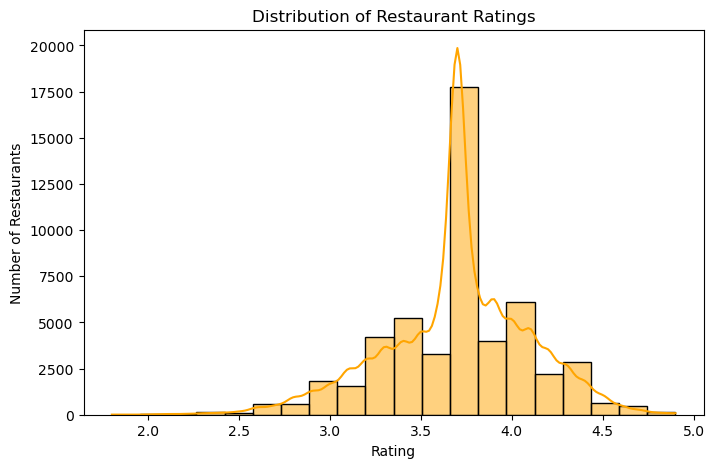

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df1['rate'], bins=20, kde=True, color='orange')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()


Insight:

+ Most restaurants are rated between 3.5 and 4.5.

+ Very few restaurants have ratings below 3 or above 4.8, indicating moderate to high-quality service across Bangalore.



#### 2. Top 10 Most Common Cuisines

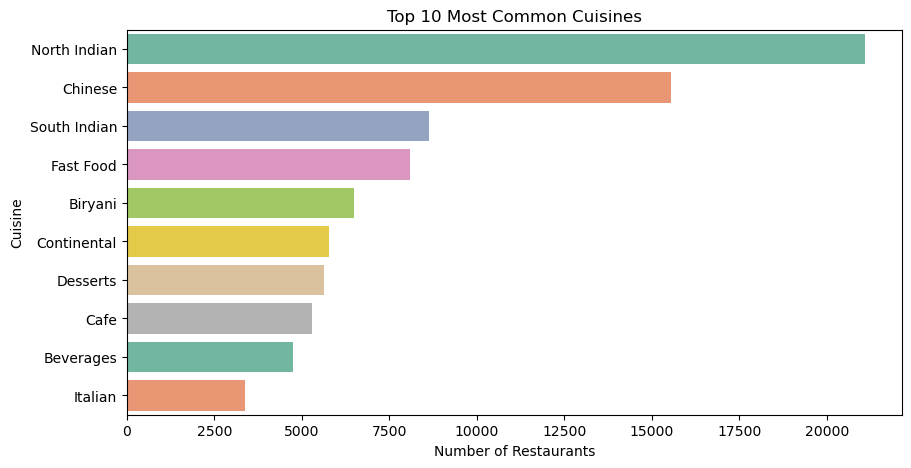

In [354]:
top_cuisines = df1['cuisines'].dropna().str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='Set2')
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


Insight:

+ North Indian, South Indian, and Chinese are the most offered cuisines.

+ Indian preferences dominate the market.

#### 3. Top Localities by Restaurant Count

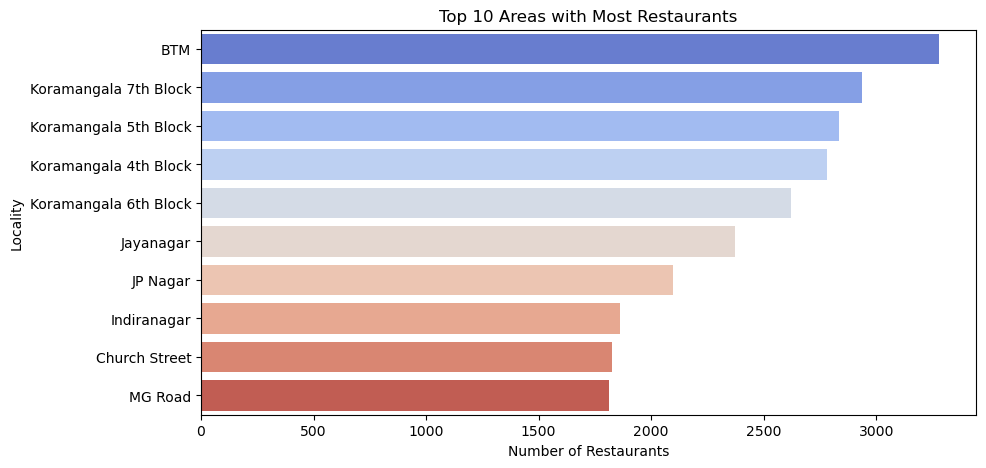

In [357]:
top_areas = df1['listed_incity'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_areas.values, y=top_areas.index, palette='coolwarm')
plt.title('Top 10 Areas with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Locality')
plt.show()


Insight:
+ Areas like BTM, Whitefield, and HSR have a dense concentration of restaurants—hubs for foodies!

#### 4. Cost vs Rating Relationship

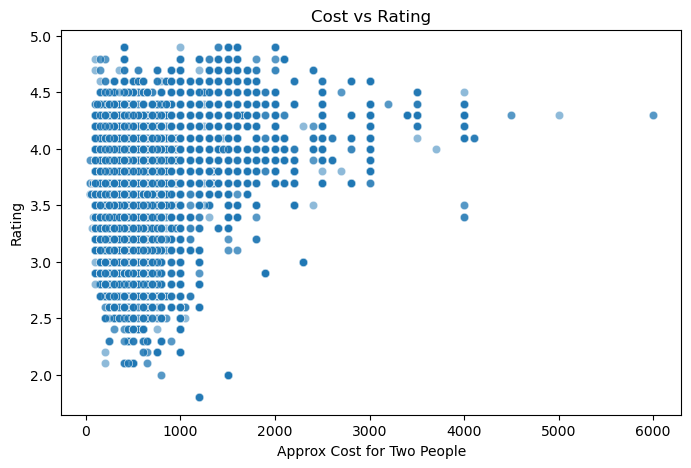

In [360]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='approx_costfor_two_people', y='rate', data=df1, alpha=0.5)
plt.title('Cost vs Rating')
plt.xlabel('Approx Cost for Two People')
plt.ylabel('Rating')
plt.show()


Insight:

+ No strong linear relationship.

+ You can find highly rated places at both low and high price ranges.

#### 5. Restaurant Type Frequency

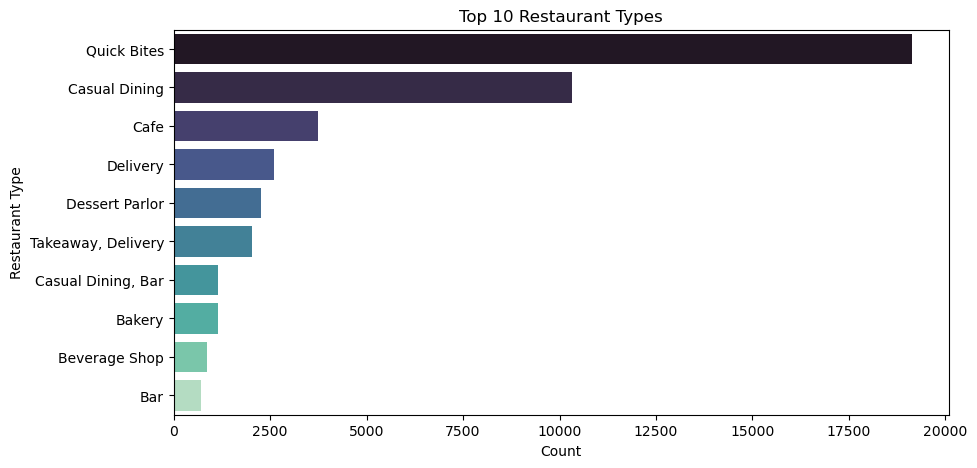

In [363]:
top_rest_types = df1['rest_type'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_rest_types.values, y=top_rest_types.index, palette='mako')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()


Insight:

+ Quick Bites and Casual Dining dominate Bangalore’s restaurant ecosystem.

+ These formats are popular for both daily and social eating.

In [292]:
import folium
from folium.plugins import HeatMap

heat_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

bangalore_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

heat_data = list(zip(heat_df['Latitude'], heat_df['Longitude']))
HeatMap(heat_data, radius=15).add_to(bangalore_map)

bangalore_map.save("bangalore_restaurant_density_map.html")
bangalore_map

In [302]:
import folium

italian_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

for index, row in italian_df.dropna(subset=['Latitude', 'Longitude']).iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['listed_intype']}<br>{row['rest_type']}<br>⭐ {row['rate']}",
        icon=folium.Icon(color='Violet', icon='pizza-slice', prefix='fa')
    ).add_to(italian_map)

italian_map.save("italian_restaurants_bangalore.html")
italian_map

## 1. What is the shape of the given dataset?


(6263 rows, 10 columns)


(51,717 rows, 10 columns)


(6804 rows, 17 columns)


(8450 rows, 11 columns)

In [186]:
df1.shape

(51717, 10)

## 2. How many restaurants serve North Indian cuisine? 


14,567


21,085


11,234


15,678

In [191]:
count = df1[df1['cuisines'].str.contains('North Indian', na=False)].shape[0]
print("North indian cuisine count:", count)


North indian cuisine count: 21085


## 3. What cuisine is most commonly offered by restaurants in Bangalore?
nt
North Ind

ian
South Ind

ian
Bir

yani
Bakery, Desserts

In [199]:
all_cuisine = df1['cuisines'].str.split(', ').explode()
cuisine_counts = all_cuisine.value_counts()
print("Most commonly offered cuisine:", cuisine_counts.idxmax())

Most commonly offered cuisine: North Indian


## 4. Which locality in Bangalore has the highest average cost for dining (for two people)?


Banashankari


Church Street


Indiranagar


Whitefield

In [203]:
avg_cost_by_locality = df1.groupby('listed_incity')['approx_costfor_two_people'].mean().sort_values(ascending=False)
print(avg_cost_by_locality.head())

listed_incity
Church Street     770.361248
Brigade Road      766.676088
MG Road           759.364992
Lavelle Road      751.151950
Residency Road    739.573457
Name: approx_costfor_two_people, dtype: float64


## 5. Which restaurant type has the top rating with over 1000 votes? 

Bakery, Cafe


Casual Dining, Pub


Bakery


Microbrewery, Pub

In [210]:
votes_1000 = df1[df1['votes'] > 1000]
top_rated_rest_types = votes_1000.groupby('rest_type')['rate'].mean().sort_values(ascending=False)
print(top_rated_rest_types.head())

rest_type
Bakery                  4.800000
Pub, Cafe               4.657500
Cafe, Dessert Parlor    4.578261
Dessert Parlor          4.518367
Microbrewery            4.508333
Name: rate, dtype: float64


## 6. How much does it cost at minimum to eat out in Bangalore?

₹200


₹500


₹300


₹1000

In [307]:
df1['approx_costfor_two_people'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140])

In [309]:
df1['approx_costfor_two_people'].min()

40

## 7. What percentage of total online orders is received by restaurants in Banashankari?


30%


44%


58%


75%

In [312]:
total_orders = df1[df1['online_order'] == 1]
banashankari_orders = total_orders[total_orders['listed_incity'] == 'Banashankari']
percentage_banashankari_orders = (len(banashankari_orders) / len(total_orders)) * 100
percentage_banashankari_orders


1.7934568387859677

## 8. Which locality has the most restaurants with over 500 votes and a rating below 3.0?


Bellandur


Whitefield


Brookefield


HSR

In [315]:
rated_below_3 = df1[(df1['votes'] > 500) & (df1['rate'] < 3.0)]
num_of_resturants = rated_below_3['listed_incity'].value_counts()
high_locality = num_of_resturants.idxmax()
high_count = num_of_resturants.max()
high_locality, high_count


('Brookefield', 8)

## 9. Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?


Brigade Road


BTM


Bannerghatta Road


Brookefield

In [320]:
df1.groupby('listed_incity')['rest_type'].sum()

listed_incity
BTM                      Casual DiningCasual DiningCasual Dining, Micro...
Banashankari             Casual DiningCasual DiningCafe, Casual DiningQ...
Bannerghatta Road        PubCasual DiningCasual DiningCasual DiningCasu...
Basavanagudi             Casual DiningCasual DiningCasual DiningCasual ...
Bellandur                Casual DiningCasual Dining, BarCasual DiningCa...
Brigade Road             Casual DiningCasual DiningCasual DiningCasual ...
Brookefield              Casual Dining, CafeCasual DiningCasual Dining,...
Church Street            Casual DiningCasual DiningCasual Dining, BarCa...
Electronic City          Casual DiningCasual DiningPub, Casual DiningCa...
Frazer Town              Casual DiningCasual Dining, BarFine DiningCasu...
HSR                      Casual Dining, BarCasual DiningLounge, Casual ...
Indiranagar              Casual Dining, MicrobreweryCasual DiningPub, M...
JP Nagar                 Casual DiningCasual DiningCasual DiningCasual ...
Jayanagar  

### Q10. What's the average cost difference between buffet and delivery restaurants?

In [323]:
np.average(df1[df1['listed_intype'] == "Buffet"]['approx_costfor_two_people']) - np.average(df1[df1['listed_intype'] == "Delivery"]['approx_costfor_two_people'])

831.2513659898209

### Q11. What is the maximum number of votes received by any restaurant with online ordering?

In [328]:
df1.groupby(df1['online_order'] == 1)["votes"].max()

online_order
False    14956
True     16832
Name: votes, dtype: int32

### Q.12 What is the average rating of restaurants that serve both North Indian and Chinese cuisines?

In [331]:
np.average(df1[(df1["cuisines"].str.contains("North Indian") ) & (df1['cuisines'].str.contains("Chinese"))]['rate'])

3.5919080217658412

### Q13. What is the most profitable area for Zomato based on potential revenue estimation?

In [340]:
df1["potential_revenue"] = df1['votes'] * df1['approx_costfor_two_people'] 
df1.groupby('listed_incity')['potential_revenue'].sum().sort_values(ascending=False).idxmax()

'Koramangala 7th Block'

### Q14. If Zomato wants to reduce customer complaints, which restaurant type should they focus on?

In [345]:
df1[df1['rate'] < 3.5]['rest_type'].value_counts().idxmax()

'Quick Bites'

### Q.15 In which area should Zomato invest by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders?

In [348]:
df1[ (df1['rate'] > 4.2) & ( df1['votes'] > 500 ) & df1['online_order'] == 1]['listed_incity'].value_counts().sort_index().idxmax()

'Koramangala 7th Block'